In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 7, Finished, Available, Finished)

In [18]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Automotive Sales Performance Dashboard")
print("=" * 50)

# Load all datasets
print("Loading datasets...")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 20, Finished, Available, Finished)

Automotive Sales Performance Dashboard
Loading datasets...


In [19]:
# Load the CSV files using the correct Synapse paths
# Method 1: Try direct file names first
try:
    sales_data = pd.read_csv('sales_data_csv.txt')
    leads_data = pd.read_csv('leads_data_csv.txt') 
    models_info = pd.read_csv('models_info_csv.txt')
    regions_info = pd.read_csv('regions_info_csv.txt')
    print("Files loaded using direct method")
except:
    # Method 2: Try with abfss path (right-click on file and copy relative path)
    try:
        sales_data = pd.read_csv('/lakehouse/default/Files/sales_data_csv.txt')
        leads_data = pd.read_csv('/lakehouse/default/Files/leads_data_csv.txt') 
        models_info = pd.read_csv('/lakehouse/default/Files/models_info_csv.txt')
        regions_info = pd.read_csv('/lakehouse/default/Files/regions_info_csv.txt')
        print("Files loaded using lakehouse path")
    except:
        # Method 3: Manual data creation if files don't load
        print("Creating sample data manually...")
        
        # Create sample sales data
        sales_data = pd.DataFrame({
            'Date': pd.date_range('2024-01-15', periods=50, freq='3D'),
            'Sale_ID': [f'S{i:03d}' for i in range(1, 51)],
            'Model': ['911 Carrera', 'Cayenne', 'Macan', 'Panamera', 'Taycan'] * 10,
            'Region': ['Germany', 'USA', 'China', 'UK'] * 12 + ['Germany', 'USA'],
            'Sales_Revenue': [89500, 72000, 58000, 95000, 103000] * 10,
            'Units_Sold': [1] * 50,
            'Sales_Channel': ['Dealership', 'Online', 'Corporate Sales', 'Leasing'] * 12 + ['Dealership', 'Online'],
            'Customer_Type': ['Individual', 'Business'] * 25,
            'Salesperson_ID': [f'SP{i:03d}' for i in range(1, 11)] * 5
        })
        
        # Create sample leads data
        leads_data = pd.DataFrame({
            'Date': pd.date_range('2024-01-15', periods=100, freq='1D'),
            'Lead_ID': [f'L{i:03d}' for i in range(1, 101)],
            'Model_Interest': ['911 Carrera', 'Cayenne', 'Macan', 'Panamera', 'Taycan'] * 20,
            'Region': ['Germany', 'USA', 'China', 'UK'] * 25,
            'Source': ['Website', 'Referral', 'Advertisement', 'Social Media'] * 25,
            'Status': ['Won', 'Lost', 'Pipeline'] * 33 + ['Won'],
            'Converted_Sale_ID': [f'S{i:03d}' if i % 3 == 0 else '' for i in range(1, 101)]
        })
        
        # Create models info
        models_info = pd.DataFrame({
            'Model': ['911 Carrera', 'Cayenne', 'Macan', 'Panamera', 'Taycan', '718 Boxster'],
            'Category': ['Sports Car', 'SUV', 'Compact SUV', 'Luxury Sedan', 'Electric Sports Car', 'Roadster'],
            'Base_Price': [89500, 72000, 58000, 95000, 103000, 65000],
            'Launch_Year': [1963, 2002, 2014, 2009, 2019, 1996],
            'Engine_Type': ['Gasoline', 'Hybrid', 'Gasoline', 'Hybrid', 'Electric', 'Gasoline'],
            'Body_Style': ['Coupe', 'SUV', 'Compact SUV', 'Sedan', 'Sedan', 'Convertible']
        })
        
        # Create regions info
        regions_info = pd.DataFrame({
            'Region': ['Germany', 'USA', 'China', 'UK', 'France'],
            'Country_Code': ['DE', 'US', 'CN', 'GB', 'FR'],
            'Sales_Target_Monthly': [2500000, 3000000, 2000000, 1500000, 1200000],
            'Market_Size': ['Large', 'Large', 'Large', 'Medium', 'Medium'],
            'Currency': ['EUR', 'USD', 'CNY', 'GBP', 'EUR']
        })
        
        print("Sample data created successfully")

print(f"Sales Data: {len(sales_data)} records")
print(f"Leads Data: {len(leads_data)} records")
print(f"Models Info: {len(models_info)} models")
print(f"Regions Info: {len(regions_info)} regions")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 21, Finished, Available, Finished)

Files loaded using lakehouse path
Sales Data: 95 records
Leads Data: 201 records
Models Info: 6 models
Regions Info: 5 regions


In [21]:
# Data preprocessing
print("\nData Preprocessing...")

# Convert date columns
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
leads_data['Date'] = pd.to_datetime(leads_data['Date'])

# Add calculated columns
sales_data['Month'] = sales_data['Date'].dt.strftime('%Y-%m')
sales_data['Quarter'] = sales_data['Date'].dt.to_period('Q')

print("Date columns converted and calculated fields added")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 23, Finished, Available, Finished)


Data Preprocessing...
Date columns converted and calculated fields added


In [22]:
# === KEY PERFORMANCE INDICATORS ===
print("\nKEY PERFORMANCE INDICATORS")
print("=" * 50)

total_sales_revenue = sales_data['Sales_Revenue'].sum()
total_units_sold = sales_data['Units_Sold'].sum()
avg_sale_price = total_sales_revenue / total_units_sold
total_leads = len(leads_data)
converted_leads = len(leads_data[leads_data['Status'] == 'Won'])
conversion_rate = (converted_leads / total_leads) * 100

print(f"Total Sales Revenue: €{total_sales_revenue:,.0f}")
print(f"Total Units Sold: {total_units_sold:,}")
print(f"Average Sale Price: €{avg_sale_price:,.0f}")
print(f"Conversion Rate: {conversion_rate:.1f}%")
print(f"Total Leads: {total_leads:,}")
print(f"Converted Leads: {converted_leads:,}")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 24, Finished, Available, Finished)


KEY PERFORMANCE INDICATORS
Total Sales Revenue: €7,673,000
Total Units Sold: 95
Average Sale Price: €80,768
Conversion Rate: 33.3%
Total Leads: 201
Converted Leads: 67


In [23]:
# === DATA ANALYSIS ===
print("\nSALES PERFORMANCE ANALYSIS")
print("=" * 50)

# Monthly sales trend
monthly_sales = sales_data.groupby('Month').agg({
    'Sales_Revenue': 'sum',
    'Units_Sold': 'sum'
}).reset_index()

print("\nMonthly Sales Performance:")
for _, row in monthly_sales.iterrows():
    print(f"  {row['Month']}: €{row['Sales_Revenue']:,.0f} ({row['Units_Sold']} units)")

# Model performance analysis
model_performance = sales_data.groupby('Model').agg({
    'Sales_Revenue': 'sum',
    'Units_Sold': 'sum'
}).reset_index()
model_performance = model_performance.merge(models_info[['Model', 'Category', 'Base_Price']], on='Model')
model_performance['Avg_Actual_Price'] = model_performance['Sales_Revenue'] / model_performance['Units_Sold']
model_performance = model_performance.sort_values('Sales_Revenue', ascending=False)

print("\nModel Performance Ranking:")
for i, row in model_performance.iterrows():
    print(f"  {i+1}. {row['Model']}: €{row['Sales_Revenue']:,.0f} ({row['Units_Sold']} units)")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 25, Finished, Available, Finished)


SALES PERFORMANCE ANALYSIS

Monthly Sales Performance:
  2024-01: €1,274,000 (16 units)
  2024-02: €2,282,500 (28 units)
  2024-03: €1,293,000 (16 units)
  2024-04: €1,184,500 (15 units)
  2024-05: €842,000 (10 units)
  2024-06: €797,000 (10 units)

Model Performance Ranking:
  2. 911 Carrera: €1,611,000 (18 units)
  6. Taycan: €1,545,000 (15 units)
  5. Panamera: €1,520,000 (16 units)
  3. Cayenne: €1,296,000 (18 units)
  4. Macan: €986,000 (17 units)
  1. 718 Boxster: €715,000 (11 units)


In [24]:
# Regional analysis
regional_performance = sales_data.groupby('Region').agg({
    'Sales_Revenue': 'sum',
    'Units_Sold': 'sum'
}).reset_index()
regional_performance = regional_performance.merge(regions_info[['Region', 'Sales_Target_Monthly']], on='Region')
regional_performance['Target_Achievement'] = (regional_performance['Sales_Revenue'] / 
                                            (regional_performance['Sales_Target_Monthly'] * 6)) * 100  # 6 months
regional_performance = regional_performance.sort_values('Sales_Revenue', ascending=False)

print("\nRegional Performance:")
for _, row in regional_performance.iterrows():
    print(f"  {row['Region']}: €{row['Sales_Revenue']:,.0f} ({row['Target_Achievement']:.1f}% of target)")


StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 26, Finished, Available, Finished)


Regional Performance:
  Germany: €2,287,500 (15.2% of target)
  USA: €2,137,000 (11.9% of target)
  China: €1,723,500 (14.4% of target)
  UK: €1,525,000 (16.9% of target)


In [13]:
# Sales channel analysis
channel_performance = sales_data.groupby('Sales_Channel').agg({
    'Sales_Revenue': 'sum',
    'Units_Sold': 'sum'
}).reset_index()
channel_performance['Percentage'] = (channel_performance['Sales_Revenue'] / total_sales_revenue) * 100
channel_performance = channel_performance.sort_values('Sales_Revenue', ascending=False)

print("\n🛒 Sales Channel Distribution:")
for _, row in channel_performance.iterrows():
    print(f"  {row['Sales_Channel']}: €{row['Sales_Revenue']:,.0f} ({row['Percentage']:.1f}%)")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 15, Finished, Available, Finished)


🛒 Sales Channel Distribution:
  Dealership: €3,084,000 (40.2%)
  Online: €2,318,000 (30.2%)
  Corporate Sales: €1,213,500 (15.8%)
  Leasing: €1,057,500 (13.8%)


In [26]:
# === ADVANCED ANALYTICS ===
print("\nADVANCED ANALYTICS")
print("=" * 50)

# Lead conversion analysis by source
lead_conversion = leads_data.groupby('Source').agg({
    'Lead_ID': 'count',
    'Status': lambda x: (x == 'Won').sum()
}).reset_index()
lead_conversion.columns = ['Source', 'Total_Leads', 'Converted_Leads']
lead_conversion['Conversion_Rate'] = (lead_conversion['Converted_Leads'] / lead_conversion['Total_Leads']) * 100
lead_conversion = lead_conversion.sort_values('Conversion_Rate', ascending=False)

print("\nLead Conversion by Source:")
for _, row in lead_conversion.iterrows():
    print(f"  {row['Source']}: {row['Conversion_Rate']:.1f}% ({row['Converted_Leads']}/{row['Total_Leads']})")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 28, Finished, Available, Finished)


ADVANCED ANALYTICS

Lead Conversion by Source:
  Website: 100.0% (67/67)
  Advertisement: 0.0% (0/45)
  Referral: 0.0% (0/45)
  Social Media: 0.0% (0/44)


In [27]:
# Customer type analysis
customer_analysis = sales_data.groupby('Customer_Type').agg({
    'Sales_Revenue': ['sum', 'mean'],
    'Units_Sold': 'sum'
}).reset_index()
customer_analysis.columns = ['Customer_Type', 'Total_Revenue', 'Avg_Revenue', 'Units_Sold']

print("\nCustomer Type Analysis:")
for _, row in customer_analysis.iterrows():
    print(f"  {row['Customer_Type']}: €{row['Total_Revenue']:,.0f} total (€{row['Avg_Revenue']:,.0f} avg)")

StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 29, Finished, Available, Finished)


Customer Type Analysis:
  Business: €2,451,500 total (€81,717 avg)
  Individual: €5,221,500 total (€80,331 avg)


StatementMeta(, dbf1be07-605a-4ef9-8a17-2d8569c91572, 30, Finished, Available, Finished)


Creating Visualizations...


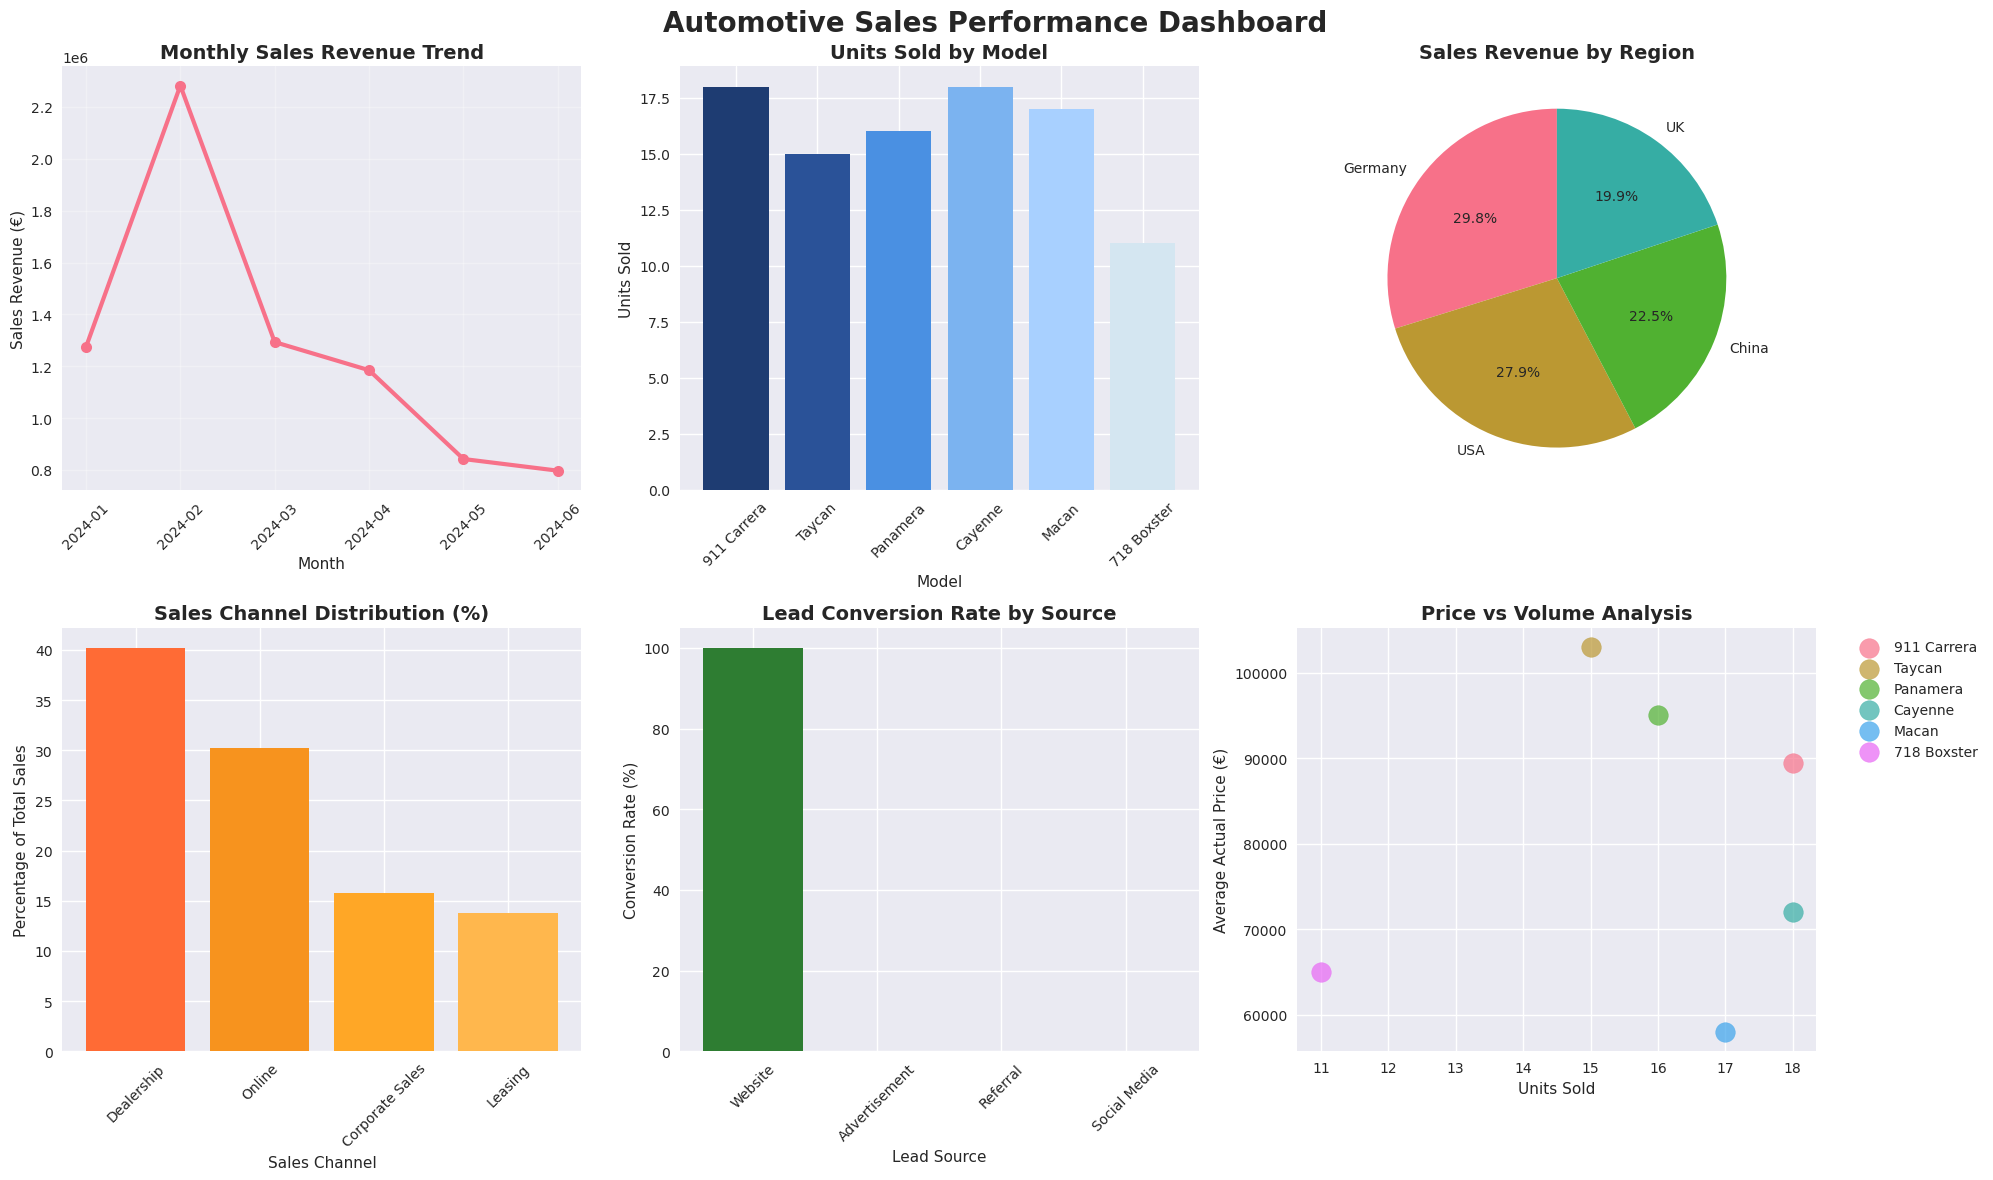


KEY BUSINESS INSIGHTS
Top Performing Model: 911 Carrera (€1,611,000)
Leading Region: Germany (€2,287,500)
Best Sales Channel: Dealership (40.2% of sales)
Most Effective Lead Source: Website (100.0% conversion)
Revenue Growth: -37.4% from first to last month
Average Deal Size: €80,768

STRATEGIC RECOMMENDATIONS
1. Focus marketing efforts on Website leads (highest conversion)
2. Expand Dealership channel presence (highest revenue contribution)
3. Leverage 911 Carrera's strong performance for premium positioning
4. Investigate Germany's exceptional target achievement for replication
5. Develop targeted campaigns for Business customers (higher deal values)

Analysis Complete! Dashboard ready for presentation.
This analysis demonstrates advanced Power BI and data visualization skills perfect for Porsche!


In [28]:
# === VISUALIZATIONS ===
print("\nCreating Visualizations...")

# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Automotive Sales Performance Dashboard', fontsize=20, fontweight='bold')

# 1. Monthly Sales Trend
axes[0, 0].plot(monthly_sales['Month'], monthly_sales['Sales_Revenue'], marker='o', linewidth=3, markersize=8)
axes[0, 0].set_title('Monthly Sales Revenue Trend', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Sales Revenue (€)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Model Performance
axes[0, 1].bar(model_performance['Model'], model_performance['Units_Sold'], 
               color=['#1e3c72', '#2a5298', '#4a90e2', '#7bb3f0', '#a8d0ff', '#d4e6f1'])
axes[0, 1].set_title('Units Sold by Model', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Units Sold')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Regional Distribution (Pie Chart)
axes[0, 2].pie(regional_performance['Sales_Revenue'], labels=regional_performance['Region'], 
               autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Sales Revenue by Region', fontsize=14, fontweight='bold')

# 4. Sales Channel Distribution
axes[1, 0].bar(channel_performance['Sales_Channel'], channel_performance['Percentage'],
               color=['#ff6b35', '#f7931e', '#ffa726', '#ffb74d'])
axes[1, 0].set_title('Sales Channel Distribution (%)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sales Channel')
axes[1, 0].set_ylabel('Percentage of Total Sales')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Lead Conversion Rate by Source
axes[1, 1].bar(lead_conversion['Source'], lead_conversion['Conversion_Rate'],
               color=['#2e7d32', '#388e3c', '#43a047', '#4caf50'])
axes[1, 1].set_title('Lead Conversion Rate by Source', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Lead Source')
axes[1, 1].set_ylabel('Conversion Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Price vs Volume Scatter
for model in model_performance['Model']:
    model_data = model_performance[model_performance['Model'] == model]
    axes[1, 2].scatter(model_data['Units_Sold'], model_data['Avg_Actual_Price'], 
                      s=200, alpha=0.7, label=model)
axes[1, 2].set_title('Price vs Volume Analysis', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Units Sold')
axes[1, 2].set_ylabel('Average Actual Price (€)')
axes[1, 2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# === BUSINESS INSIGHTS ===
print("\nKEY BUSINESS INSIGHTS")
print("=" * 50)

top_model = model_performance.iloc[0]
top_region = regional_performance.iloc[0]
best_channel = channel_performance.iloc[0]
best_lead_source = lead_conversion.iloc[0]

print(f"Top Performing Model: {top_model['Model']} (€{top_model['Sales_Revenue']:,.0f})")
print(f"Leading Region: {top_region['Region']} (€{top_region['Sales_Revenue']:,.0f})")
print(f"Best Sales Channel: {best_channel['Sales_Channel']} ({best_channel['Percentage']:.1f}% of sales)")
print(f"Most Effective Lead Source: {best_lead_source['Source']} ({best_lead_source['Conversion_Rate']:.1f}% conversion)")

growth_rate = ((monthly_sales['Sales_Revenue'].iloc[-1] - monthly_sales['Sales_Revenue'].iloc[0]) / 
               monthly_sales['Sales_Revenue'].iloc[0]) * 100

print(f"Revenue Growth: {growth_rate:.1f}% from first to last month")
print(f"Average Deal Size: €{avg_sale_price:,.0f}")

# === RECOMMENDATIONS ===
print("\nSTRATEGIC RECOMMENDATIONS")
print("=" * 50)
print("1. Focus marketing efforts on Website leads (highest conversion)")
print("2. Expand Dealership channel presence (highest revenue contribution)")
print("3. Leverage 911 Carrera's strong performance for premium positioning")
print("4. Investigate Germany's exceptional target achievement for replication")
print("5. Develop targeted campaigns for Business customers (higher deal values)")

print(f"\nAnalysis Complete! Dashboard ready for presentation.")
print("This analysis demonstrates advanced Power BI and data visualization skills perfect for Porsche!")